# DBSCAN: Density-Based Spatial Clustering of Applications with Noise

## Agenda
**Introduction to Clustering**

**Visualizations & Results/ Analysis & Comparison/ Performance summary**

    1. DBSCAN, k-Means, Hierarchical on Dataset A: 'make_moons'

    2. DBSCAN, k-Means, Hierarchical on Dataset B: 'make_blobs'

**Performance summary**



**Conclusion**
Failure scenarios

Strengths/weaknesses and trade-offs

## Introduction
DBSCAN groups data points based on density rather than distance from a center (like k-means). It defines clusters as areas of high point density separated by areas of low density.

*Key Parameters*: 
*Epsilon (ε)*: Defines the neighborhood radius around a point.
The most important parameter to choose appropriately is for the data set and the distance function. 

The max distance between 2 samples for one is considered as core point

*min_samples*: The minimum number of points required to form a dense region and core point (including the point itself). DBSCAN will find denser clusters, whereas if it is set to a lower value, the found clusters will be sparser.


In [2]:
from sklearn.cluster import DBSCAN

In [ ]:
?DBSCAN

## Visualizations & Results/ Analysis & Comparison/ Performance summary
(Using sklearn Datasets)
make_moons(n_samples=300, noise=0.05)

make_blobs(n_samples=300, centers=3, cluster_std=[1.0, 2.5, 0.5])

First, set up a function for plot_clustering_resutls that plot and calculate silhouette average

In [111]:
from sklearn.metrics import silhouette_samples
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

def plot_clustering_results(x, name_of_clustering,labels):
    """
    Plots the clustering results and the silhouette scores for each sample.

    Parameters:
    x : array-like, shape (n_samples, n_features)
        The input data points.
    name_of_clustering: str
        The name of the clustering algorithm used.
        This is used for the plot title.
    labels : array-like, shape (n_samples,)
        The cluster labels for each data point
    
    Returns:
    None
    """
    plt.figure(figsize=(10, 6))

    # Plot the clustering result
    plt.scatter(x[:, 0], x[:, 1], c=labels, s=50, cmap='viridis')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'{name_of_clustering} Clustering Result')




def knn_agglo_clustering_comparision(dataset_name, x,y):
    """
    Compares clustering algorithms on the dataset and prints silhouette scores. 
    Parameters:
    data_name : str
        The name of the dataset being used.
    x : array-like, shape (n_samples, n_features)
    y: array-like, shape (n_samples,)
        The input data points and their true labels.
    Returns:
    None
    """
    # Visualize the dataset
    plt.figure(figsize=(10, 6))
    plt.scatter(x[:, 0], x[:, 1])
    plt.title(f'{dataset_name} Dataset')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()


    #Define best parameters for k-Means and Agglomerative Clustering
    from sklearn.model_selection import GridSearchCV

    # Define parameter grids
    param_grid_kmeans = {'n_clusters': [2,3,4,5]}
    param_grid_agg = {'n_clusters':[2,3,4,5], 'linkage':['ward', 'complete', 'average']}
    # Perform grid search for agglomerative clustering
    def custom_silhouette_scorer(estimator, x):
        labels = estimator.fit_predict(x)
        return silhouette_score(x, labels)
    
    #Perform search for k-Means
    grid_search_kmeans = GridSearchCV(KMeans(random_state=42), param_grid_kmeans, cv=5, scoring= custom_silhouette_scorer)
    grid_search_kmeans.fit(x)
    
    #perform grid search for Agglomerative Clustering
    grid_search_agg = GridSearchCV(AgglomerativeClustering(), param_grid_agg, cv=5, scoring= custom_silhouette_scorer)
    grid_search_agg.fit(x)
    # Print best parameters and scores
    print(f'best parameters for k-Means: {grid_search_kmeans.best_params_}')
    print(f'best silhouette score for k-Means: {grid_search_kmeans.best_score_}')
    print(f'best parameters for Agglomerative Clustering: {grid_search_agg.best_params_}')
    print(f'best silhouette score for Agglomerative Clustering: {grid_search_agg.best_score_}') 
    
    
    #PERFOMR CLUSTERING ALGORITHMS
    #perform k-Means clustering
    kmeans = KMeans(n_clusters=grid_search_kmeans.best_params_['n_clusters'], random_state=42)
    kmeans.fit(x)
    y_kmeans = kmeans.predict(x)\
    
    #perform Agglomerative Clustering
    agglo = AgglomerativeClustering(n_clusters=grid_search_agg.best_params_['n_clusters'], linkage=grid_search_agg.best_params_['linkage'])
    agglo_clusters = agglo.fit_predict(x)
    
    #visualize the clustering results
    plot_clustering_results(x, labels=y_kmeans, name_of_clustering="K-Means")
    plot_clustering_results(x, labels=agglo_clusters, name_of_clustering="Agglomerative Clustering")
    plt.show()
    
    # Calculate silhouette scores
    for name, labels in [("K-Means", y_kmeans), ("Agglomerative Clustering", agglo_clusters)]:
        silhouette_avg = silhouette_score(x, labels)
        print(f"Silhouette Score for {name}: {silhouette_avg}")

### MAKE_MOONS Dataset - where DBSCAN excels (e.g., non-spherical clusters, datasets with noise)
using make_moons data set from sklearn.datasets

#### Visualize the data + Determine best parameters for each clustering algorithm 

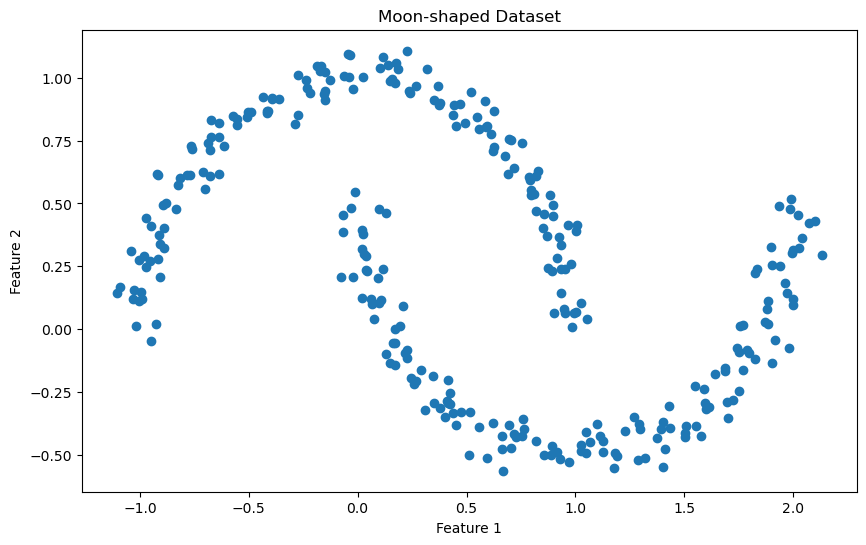

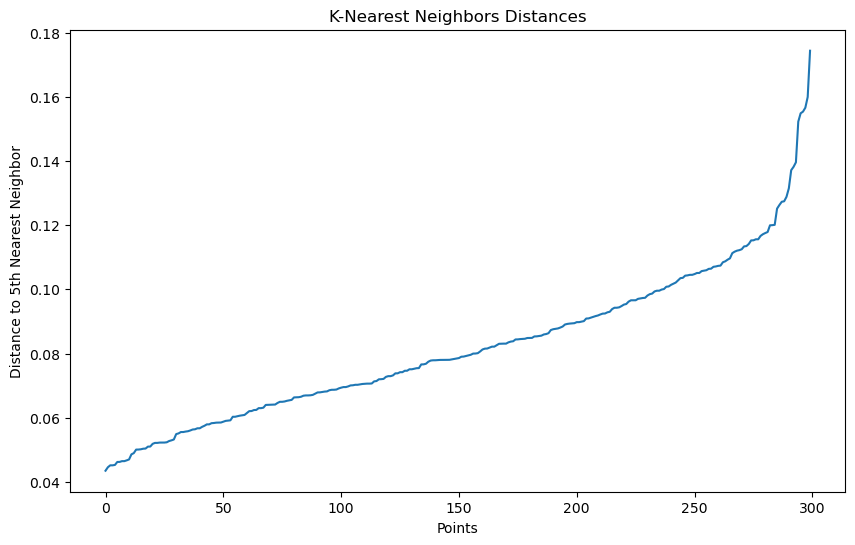

Best parameters for k-Means: {'n_clusters': 5}
Best silhouette score for k-Means: 0.5139274192268739
Best parameters for Agglomerative Clustering: {'linkage': 'ward', 'n_clusters': 5}
Best silhouette score for Agglomerative Clustering: 0.4974667228445983


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score

#load data
moon = make_moons(n_samples=300, noise=0.05, random_state=42)
x, y = moon

# Visualize the dataset
plt.figure(figsize=(10, 6))
plt.scatter(x[:, 0], x[:, 1])
plt.title('Moon-shaped Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

#DBSCAN: plot k-nearest neighbors to choose epsilon
neighbors = NearestNeighbors(n_neighbors=5)
neighbors.fit(x)
distances, _ = neighbors.kneighbors(x)
distances = np.sort(distances[:,4])
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('K-Nearest Neighbors Distances')
plt.xlabel('Points')
plt.ylabel('Distance to 5th Nearest Neighbor')
plt.show()

#Define best parameters for k-Means and Agglomerative Clustering
from sklearn.model_selection import GridSearchCV

# Define parameter grids
param_grid_kmeans = {'n_clusters': [2, 3, 4, 5]}
param_grid_agg = {'n_clusters': [2, 3, 4, 5], 'linkage': ['ward', 'complete', 'average']}

# Perform grid search for agglomerative clustering
def custom_silhouette_scorer(estimator, x):
    labels = estimator.fit_predict(x)
    return silhouette_score(x, labels)

# Perform grid search for k-Means
grid_search_kmeans = GridSearchCV(KMeans(random_state=42), param_grid_kmeans, cv=5, scoring=custom_silhouette_scorer)
grid_search_kmeans.fit(x)

#perform grid search for Agglomerative Clustering
grid_search_agg = GridSearchCV(AgglomerativeClustering(), param_grid_agg, cv=5, scoring=custom_silhouette_scorer)
grid_search_agg.fit(x)

# Print best parameters and scores
print(f"Best parameters for k-Means: {grid_search_kmeans.best_params_}")
print(f"Best silhouette score for k-Means: {grid_search_kmeans.best_score_}")

print(f"Best parameters for Agglomerative Clustering: {grid_search_agg.best_params_}")
print(f"Best silhouette score for Agglomerative Clustering: {grid_search_agg.best_score_}")



#### PERFORM CLUSTERING ALGORITHMS
Perform clustering with the best parameters found

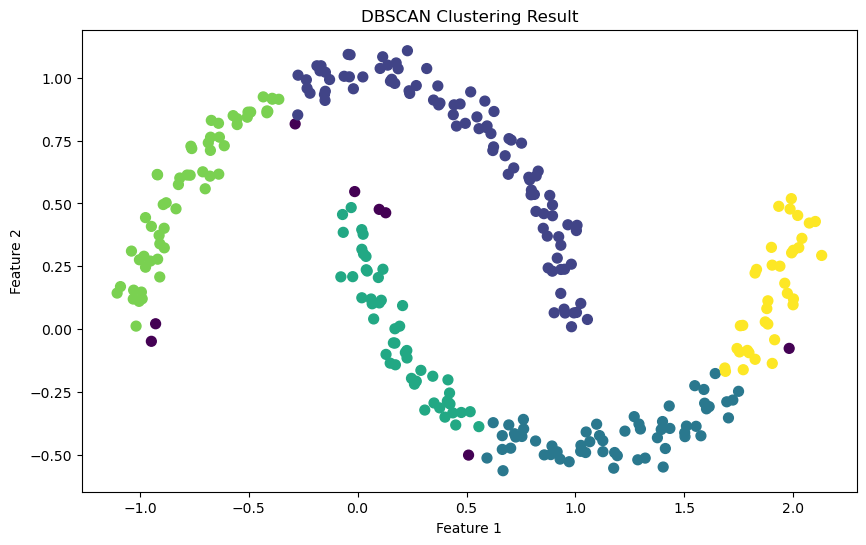

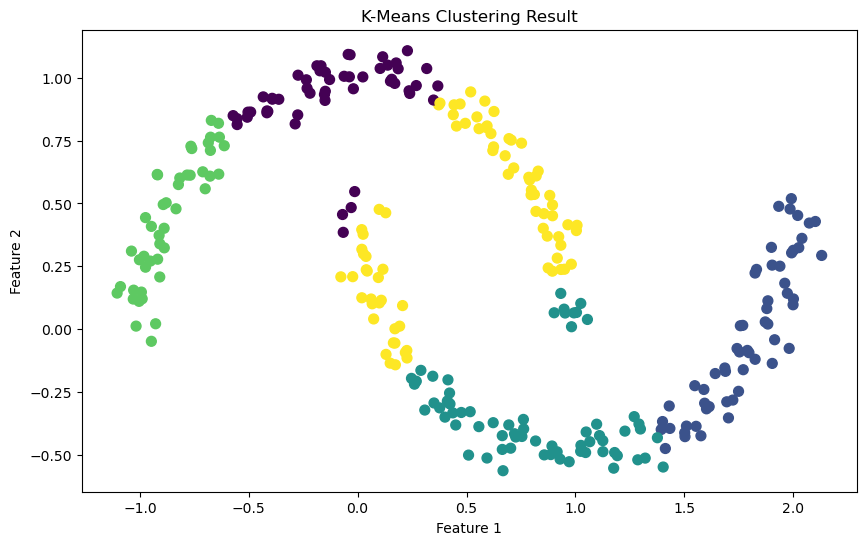

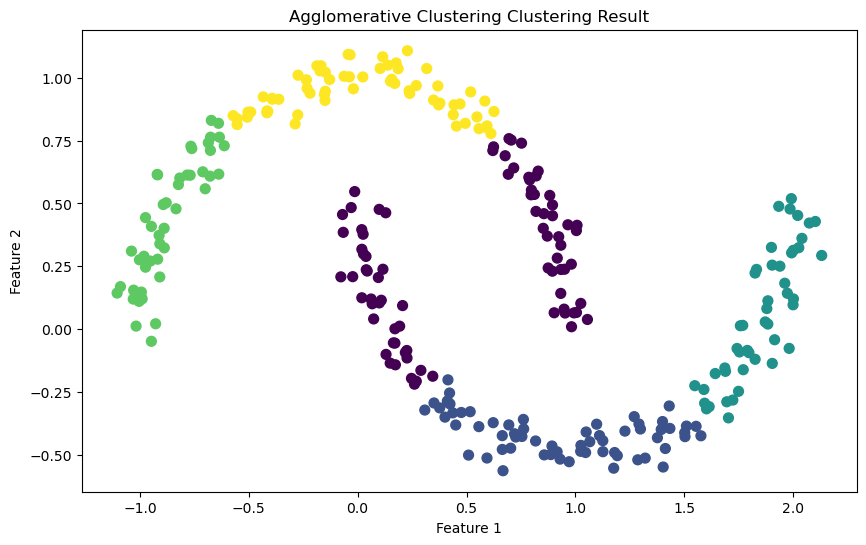

Silhouette Score for DBSCAN: 0.4300459412153109
Silhouette Score for K-Means: 0.4351558343337297
Silhouette Score for Agglomerative Clustering: 0.42590036301308243


In [94]:
#perform DBSCAN clustering
dbscan = DBSCAN(eps=0.11, min_samples=6)
dbscan_clusters= dbscan.fit_predict(x)

## Train a k-Means clustering model
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(x)
y_kmeans = kmeans.predict(x)

#Train an Agglomerative Clustering model
agglo = AgglomerativeClustering(n_clusters=5, linkage='ward')
agglo_clusters = agglo.fit_predict(x)

# Visualize the clustering results

plot_clustering_results(x, labels=dbscan_clusters, name_of_clustering="DBSCAN")
plot_clustering_results(x, labels=y_kmeans, name_of_clustering="K-Means")
plot_clustering_results(x, labels=agglo_clusters, name_of_clustering="Agglomerative Clustering")
plt.show()

# Calculate silhouette scores
for name, labels in [("DBSCAN", dbscan_clusters), ("K-Means", y_kmeans), ("Agglomerative Clustering", agglo_clusters)]:
    silhouette_avg = silhouette_score(x, labels)
    print(f"Silhouette Score for {name}: {silhouette_avg}")

 DBSCAN performs similarly or even slightly better than others both visually and numerically.
 DBSCAN creates clearer, curved clusters the respect the 2-moon shape of the data. It handles noise/ouliers better (few dark purple point)


### MAKE_BLOBS - Dataset where DBSCAN struggles (e.g., varying densities, diffi culty tuning eps)
make_blobs(n_samples=300, centers=3, cluster_std=[1.0, 2.5, 0.5])

#### Visualize the data + Determine best parameters for each clustering algorithm 

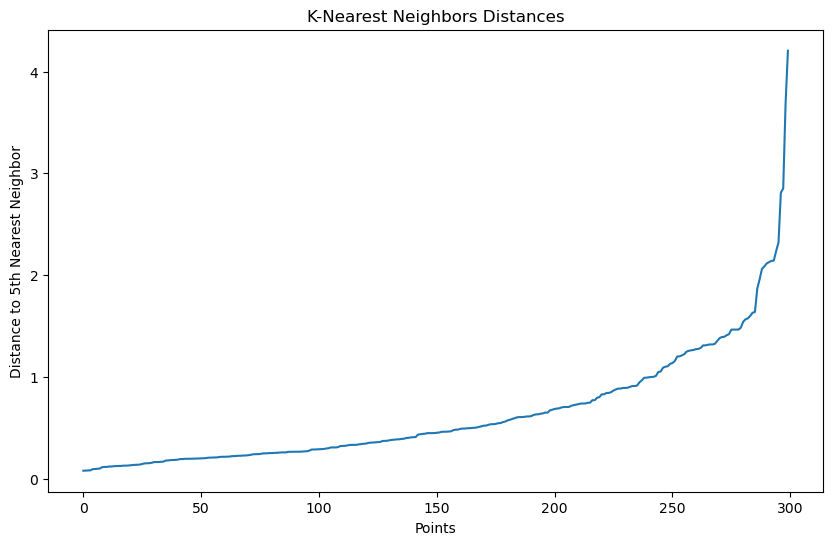

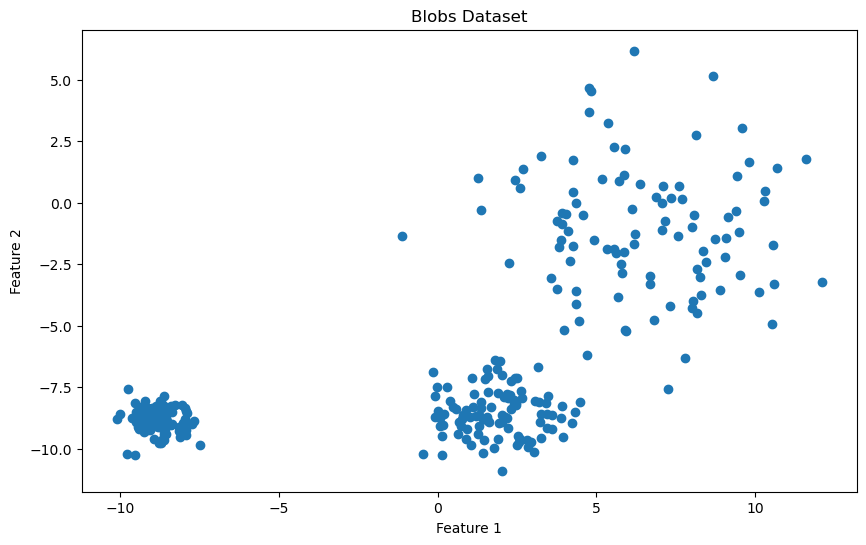

best parameters for k-Means: {'n_clusters': 3}
best silhouette score for k-Means: 0.7262923009401175
best parameters for Agglomerative Clustering: {'linkage': 'average', 'n_clusters': 3}
best silhouette score for Agglomerative Clustering: 0.7262023236935159


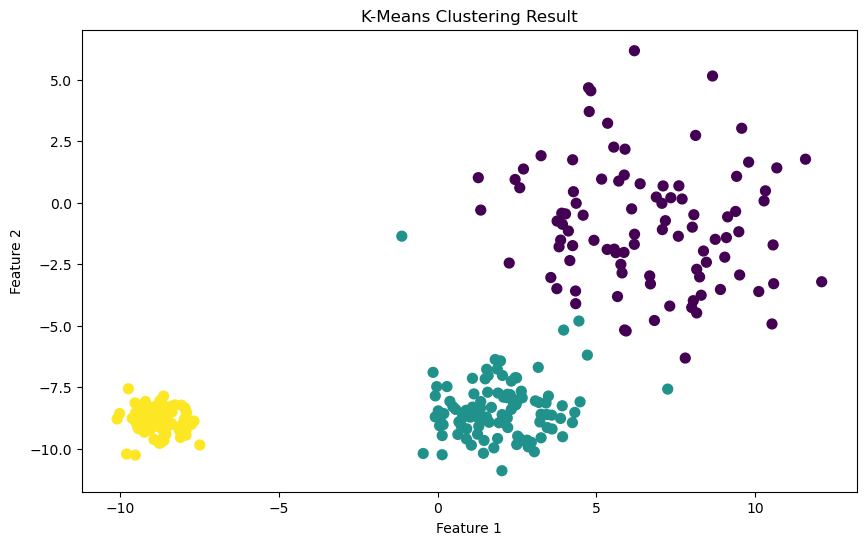

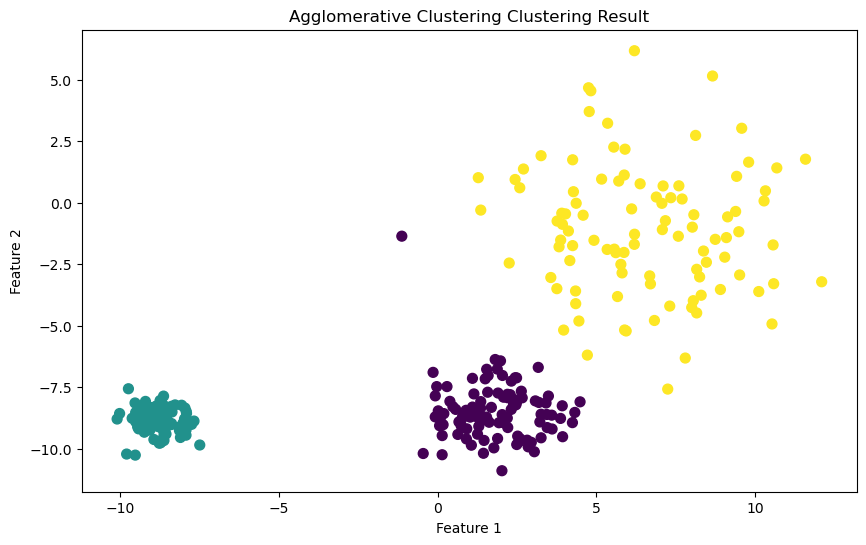

Silhouette Score for K-Means: 0.7263718219112366
Silhouette Score for Agglomerative Clustering: 0.7228063977001433
Silhouette Score for DBSCAN: 0.6569358322620189


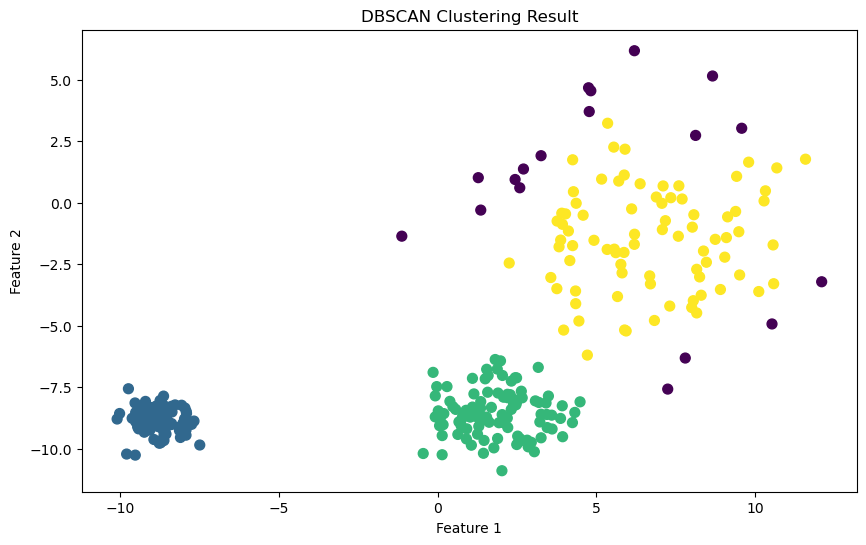

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score

#load data
blobs = make_blobs(n_samples=300, centers=3, cluster_std=[1.0, 2.5, 0.5])
x, y = blobs

#DBSCAN: plot k-nearest neighbors to choose epsilon
neighbors = NearestNeighbors(n_neighbors=6)
neighbors.fit(x)
distances, _ = neighbors.kneighbors(x)
distances = np.sort(distances[:,4])
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('K-Nearest Neighbors Distances')
plt.xlabel('Points')
plt.ylabel('Distance to 5th Nearest Neighbor')
plt.show()

#perform DBSCAN clustering
dbscan = DBSCAN(eps=1.5, min_samples=6)
dbscan_clusters= dbscan.fit_predict(x)


knn_agglo_clustering_comparision("Blobs", x, y)
plot_clustering_results(x, labels=dbscan_clusters, name_of_clustering="DBSCAN")
silhouette_avg = silhouette_score(x, dbscan_clusters)
print(f"Silhouette Score for DBSCAN: {silhouette_avg}")
    
    
    
